In [76]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
#plt.style.use("seaborn")
%matplotlib inline
import seaborn as sns
from datetime import datetime, date, time
from datetime import timedelta
import plotly.graph_objects as go
import plotly.express as px

In [77]:
df=pd.read_csv('combined_data.csv')

In [78]:
df['BusinessDate']=pd.to_datetime(df['BusinessDate'])
df.set_index('BusinessDate', inplace=True)

In [79]:
df

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources,HolidayDate,Holiday,before,before_holiday,after,after_holiday,Year,Month,Day_name
BusinessDate,,,,,,,,,,,,,,,,,,,
2010-01-01,99,NaN,1195235.33,48082.66,NaN,NaN,NaN,NaN,1195235.33,NaN,2010-01-01,New Year's Day,NaN,NaN,NaN,NaN,2010,1,Friday
2010-01-02,99,NaN,1147152.68,NaN,NaN,NaN,NaN,NaN,1147152.68,NaN,NaN,NaN,NaN,NaN,2010-01-02,New Year's Day_After,2010,1,Saturday
2010-01-03,99,NaN,1147152.68,92262.26,NaN,NaN,NaN,NaN,1147152.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,Sunday
2010-01-04,99,NaN,1054890.42,64107.06,NaN,NaN,NaN,NaN,1054890.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,Monday
2010-01-05,99,NaN,990783.35,12372.77,NaN,NaN,NaN,NaN,990783.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,501,NaN,1174197.12,18095.32,NaN,NaN,NaN,NaN,1174197.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,Monday
2020-07-28,501,NaN,1156101.79,161573.86,NaN,NaN,NaN,NaN,1156101.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,Tuesday
2020-07-29,501,440550.11,1435078.04,66574.28,NaN,NaN,NaN,NaN,1435078.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,Wednesday


In [80]:
df.BranchID.unique()

array([ 99, 108, 110, 111, 115, 118, 125, 126, 131, 133, 140, 144, 151,
       154, 155, 169, 177, 196, 203, 217, 230, 267, 270, 273, 289, 290,
       317, 319, 323, 325, 333, 334, 336, 344, 356, 362, 364, 367, 370,
       382, 398, 415, 425, 433, 434, 441, 458, 469, 501], dtype=int64)

In [81]:
df.BranchID.nunique()

49

## Group by branch

In [82]:
df_by_branch = df.groupby(['BranchID'])
data = df_by_branch['TotalCashUsed'].aggregate(['mean', 'min','max','median','std']).sort_values('mean',  ascending=False)
data

,mean,min,max,median,std
BranchID,,,,,
270,256456.407313,-2560674.65,3388010.55,212873.570,301813.173660
433,222193.140066,-2547724.37,3273394.18,149277.950,296799.474743
382,212779.963570,-3139683.52,2251423.44,164012.790,236877.475884
469,190258.809157,-2653906.11,2913168.11,168688.220,225436.510082
203,172664.957751,-1762403.65,1957894.75,124715.630,225772.821405
289,146943.400917,-1223337.04,6581830.77,101938.360,201516.039606
154,146603.409284,-1943118.50,2552311.56,96042.120,241436.584297
325,137144.767230,-1892687.73,1989840.18,96194.600,180440.784009
336,131450.435637,-1485061.81,1775520.25,96977.360,150403.911484


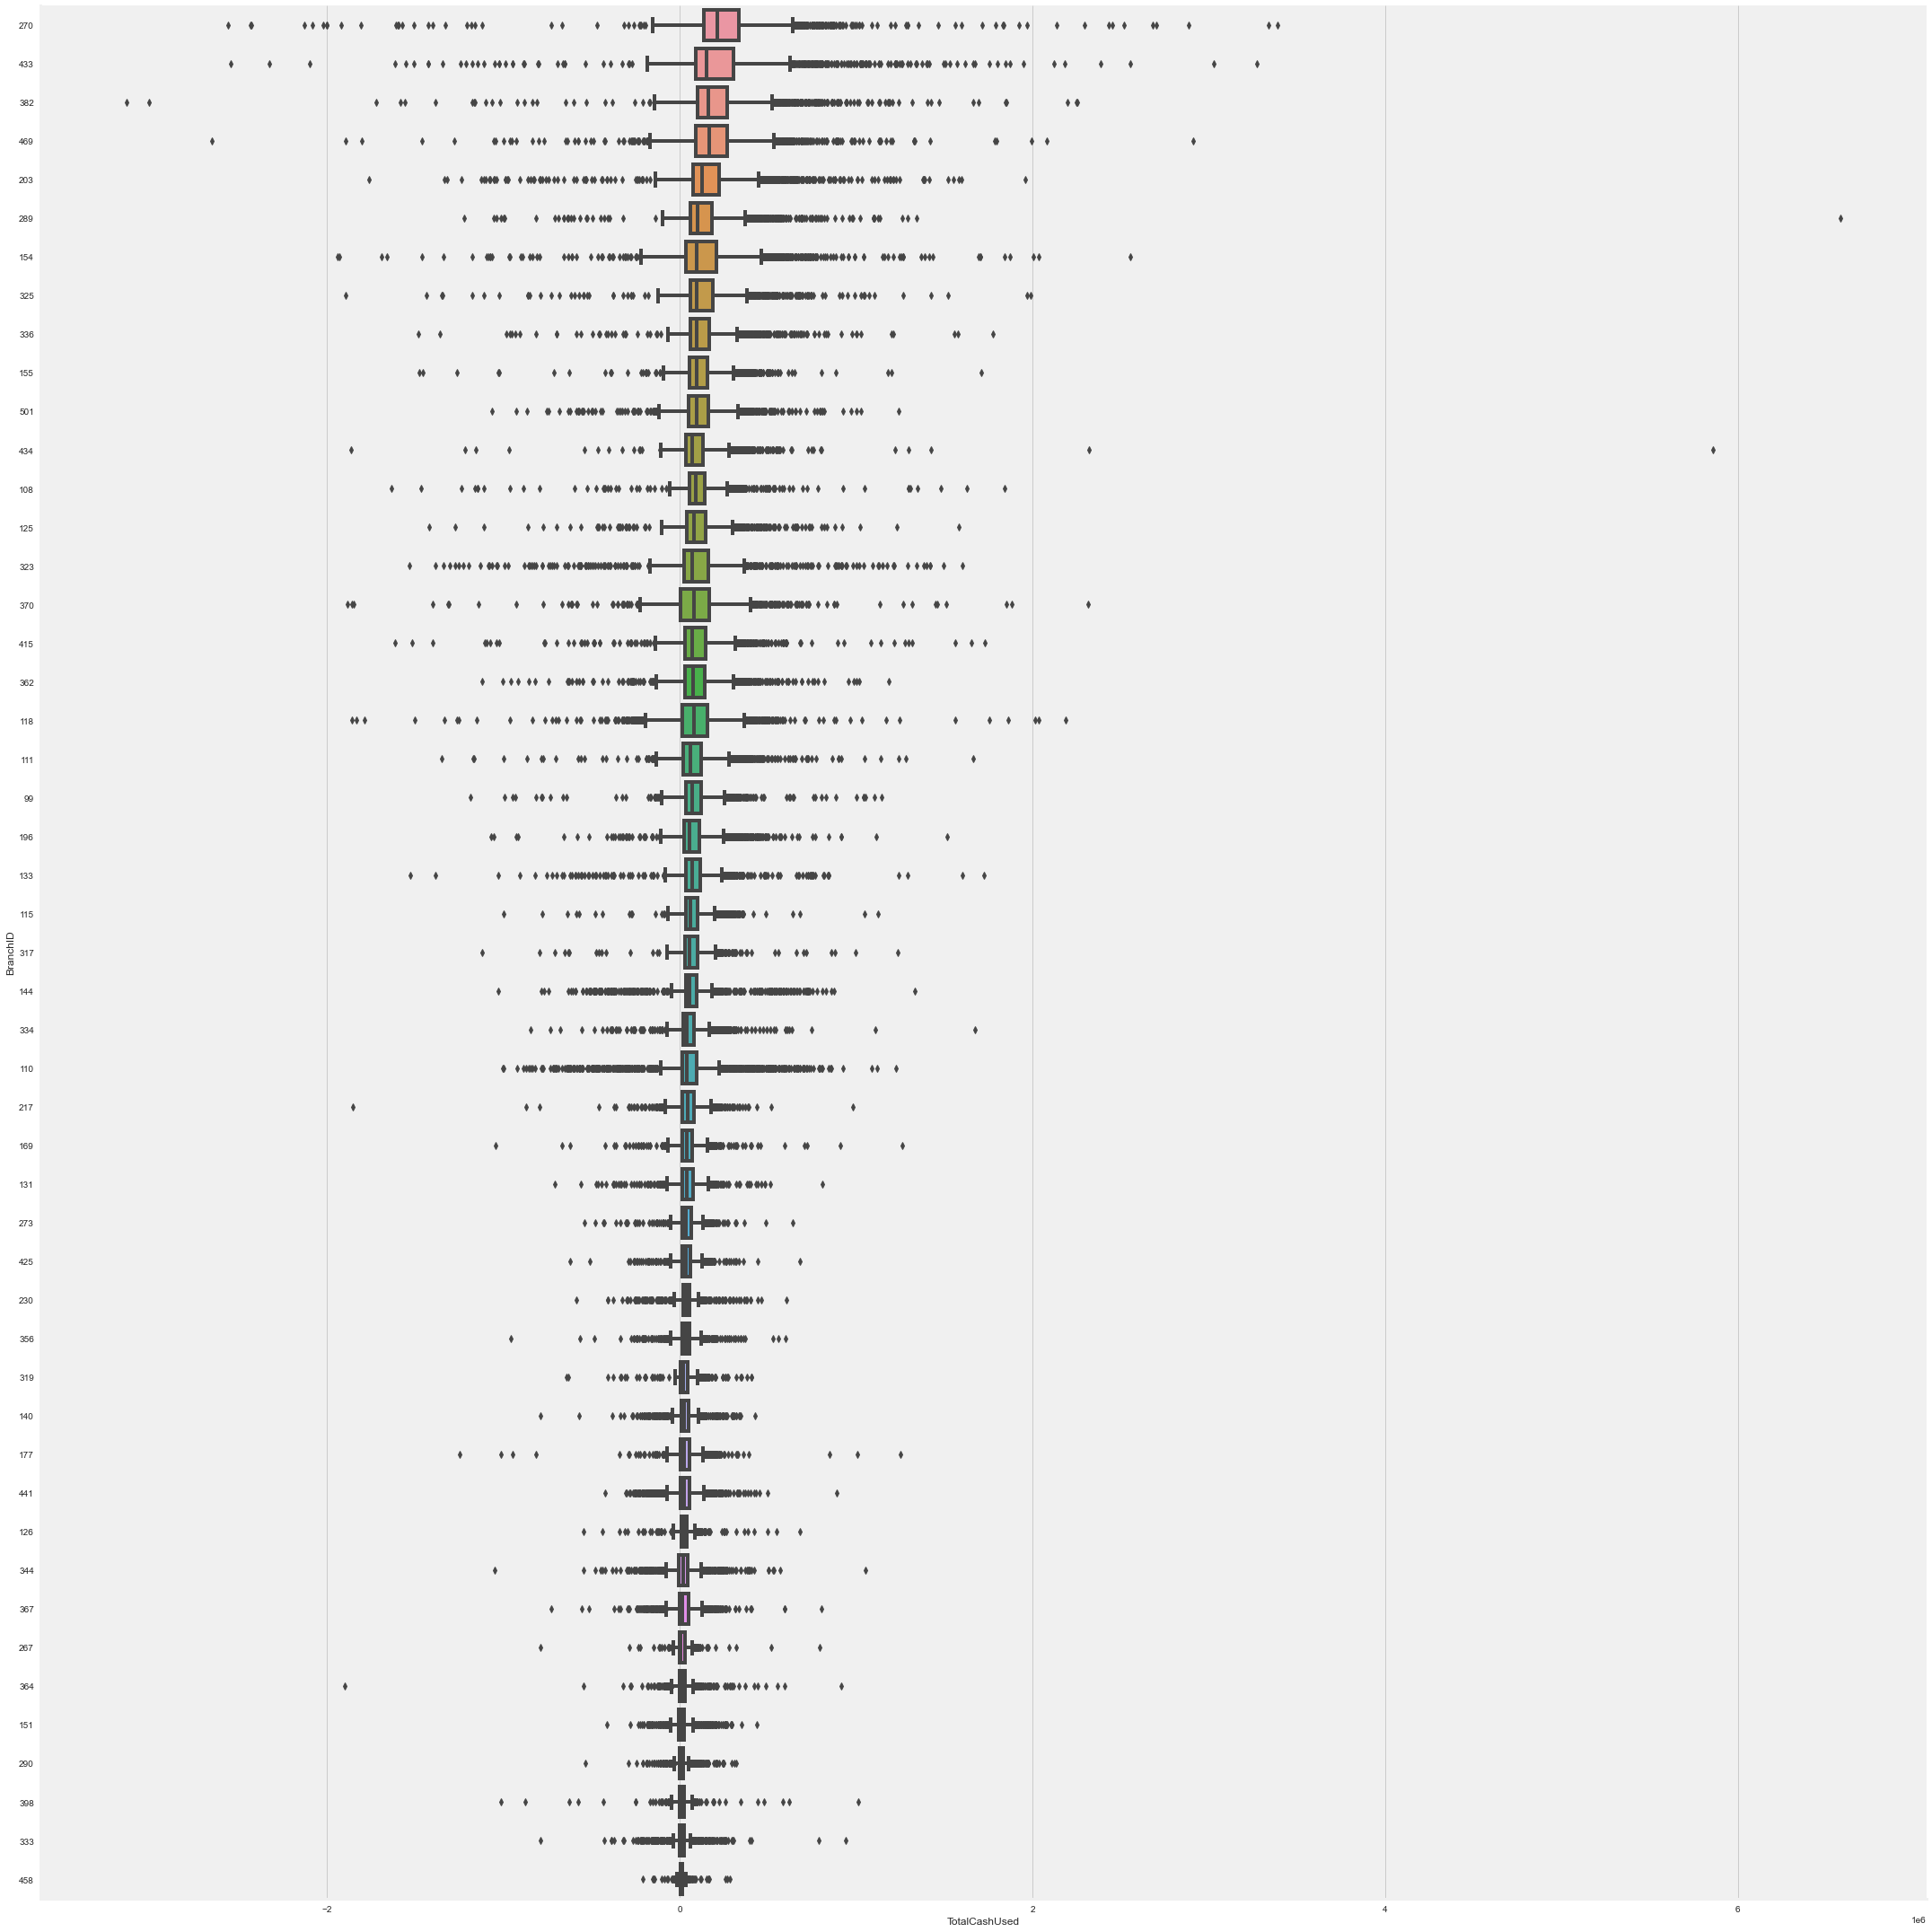

In [83]:
sns.catplot(x="TotalCashUsed", y="BranchID", kind="box", data=df, order=data.index, height=30, orient="h")

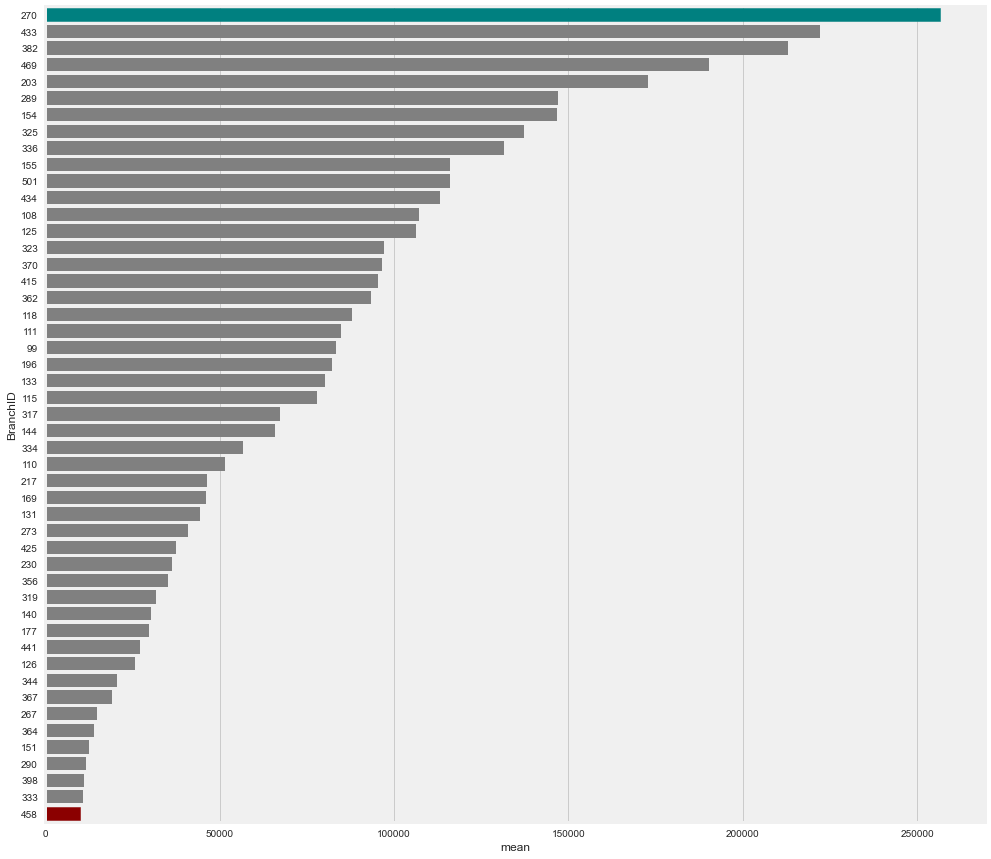

In [136]:
fig, ax = plt.subplots(figsize=(15,15))

ax = sns.barplot(y=data.index, x="mean", data=data, order=data.index, orient='h', color='gray')

ax.patches[0].set_color('teal')
ax.patches[48].set_color('darkred')

0.8

## Select one branch to visualize

In [137]:
mask = df['BranchID'] == 270
df_branch=df[mask]

In [138]:
df_branch.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources,HolidayDate,Holiday,before,before_holiday,after,after_holiday,Year,Month,Day_name
BusinessDate,,,,,,,,,,,,,,,,,,,
2010-01-01,270,NaN,2647430.41,45524.58,NaN,NaN,NaN,NaN,2647430.41,NaN,2010-01-01,New Year's Day,NaN,NaN,NaN,NaN,2010,1,Friday
2010-01-02,270,NaN,2601905.83,NaN,NaN,NaN,NaN,NaN,2601905.83,NaN,NaN,NaN,NaN,NaN,2010-01-02,New Year's Day_After,2010,1,Saturday
2010-01-03,270,NaN,2601905.83,227296.81,NaN,NaN,NaN,NaN,2601905.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,Sunday
2010-01-04,270,NaN,2374609.02,212833.84,NaN,NaN,NaN,NaN,2374609.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,Monday
2010-01-05,270,NaN,2161775.19,303769.32,NaN,NaN,NaN,NaN,2161775.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,Tuesday


In [139]:
df_branch.tail()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources,HolidayDate,Holiday,before,before_holiday,after,after_holiday,Year,Month,Day_name
BusinessDate,,,,,,,,,,,,,,,,,,,
2020-07-27,270,NaN,2311331.21,94572.48,NaN,NaN,NaN,NaN,2311331.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,Monday
2020-07-28,270,NaN,2216758.73,179025.11,NaN,NaN,NaN,NaN,2216758.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,Tuesday
2020-07-29,270,784636.11,2822369.74,253736.78,NaN,NaN,NaN,NaN,2822369.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,Wednesday
2020-07-30,270,NaN,2568632.96,565402.08,NaN,NaN,NaN,NaN,2568632.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,Thursday
2020-07-31,270,NaN,2003230.88,183955.34,NaN,1088.27,460.12,2698779.97,2440847.10,2261791.91,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,Friday


In [140]:
df_branch.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3837 entries, 2010-01-01 to 2020-07-31
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BranchID                     3837 non-null   int64  
 1   CashOrdersReceived           552 non-null    float64
 2   CashBalance_StartOfDay       3837 non-null   float64
 3   TotalCashUsed                3208 non-null   float64
 4   CashToVault                  0 non-null      float64
 5   CashUnder                    7 non-null      float64
 6   CashOver                     15 non-null     float64
 7   TotalCashDisbursed           31 non-null     float64
 8   TotalCashOpeningBalance      3837 non-null   float64
 9   TotalCashReceivedAllSources  31 non-null     float64
 10  HolidayDate                  122 non-null    object 
 11  Holiday                      122 non-null    object 
 12  before                       126 non-null    object 
 13  

## Visualize daily cash usage

In [141]:
df_branch_by_week = df_branch.reset_index().resample('W', on='BusinessDate').sum()[['TotalCashUsed']]
df_branch_by_month = df_branch.reset_index().resample('M', on='BusinessDate').sum()[['TotalCashUsed']]
df_branch_by_year = df_branch.reset_index().resample('Y', on='BusinessDate').sum()[['TotalCashUsed']]

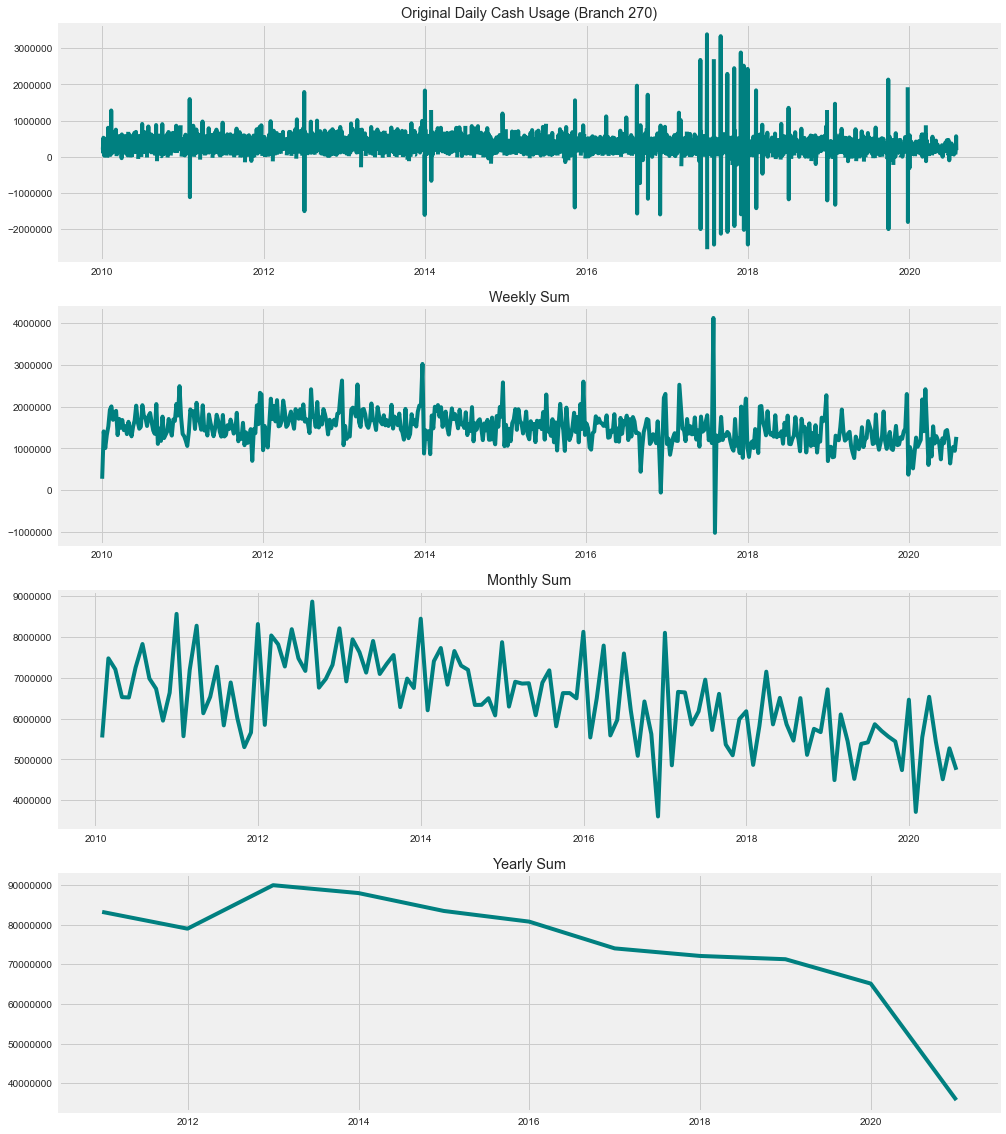

In [142]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,20))
axes[0].plot(df_branch.index, 'TotalCashUsed', data = df_branch, color='teal')
axes[0].set_title('Original Daily Cash Usage (Branch 270)')
axes[0].ticklabel_format(style='plain', axis='y')

axes[1].plot(df_branch_by_week.index, 'TotalCashUsed', data = df_branch_by_week, color='teal')
axes[1].set_title('Weekly Sum')
axes[1].ticklabel_format(style='plain', axis='y')

axes[2].plot(df_branch_by_month.index, 'TotalCashUsed', data = df_branch_by_month, color='teal')
axes[2].set_title('Monthly Sum')
axes[2].ticklabel_format(style='plain', axis='y')

axes[3].plot(df_branch_by_year.index, 'TotalCashUsed', data = df_branch_by_year,color='teal')
axes[3].set_title('Yearly Sum')
axes[3].ticklabel_format(style='plain', axis='y')

## Compare with another branch

In [143]:
mask = df['BranchID'] == 458
df_branch=df[mask]
df_branch_by_week = df_branch.reset_index().resample('W', on='BusinessDate').sum()[['TotalCashUsed']]
df_branch_by_month = df_branch.reset_index().resample('M', on='BusinessDate').sum()[['TotalCashUsed']]
df_branch_by_year = df_branch.reset_index().resample('Y', on='BusinessDate').sum()[['TotalCashUsed']]

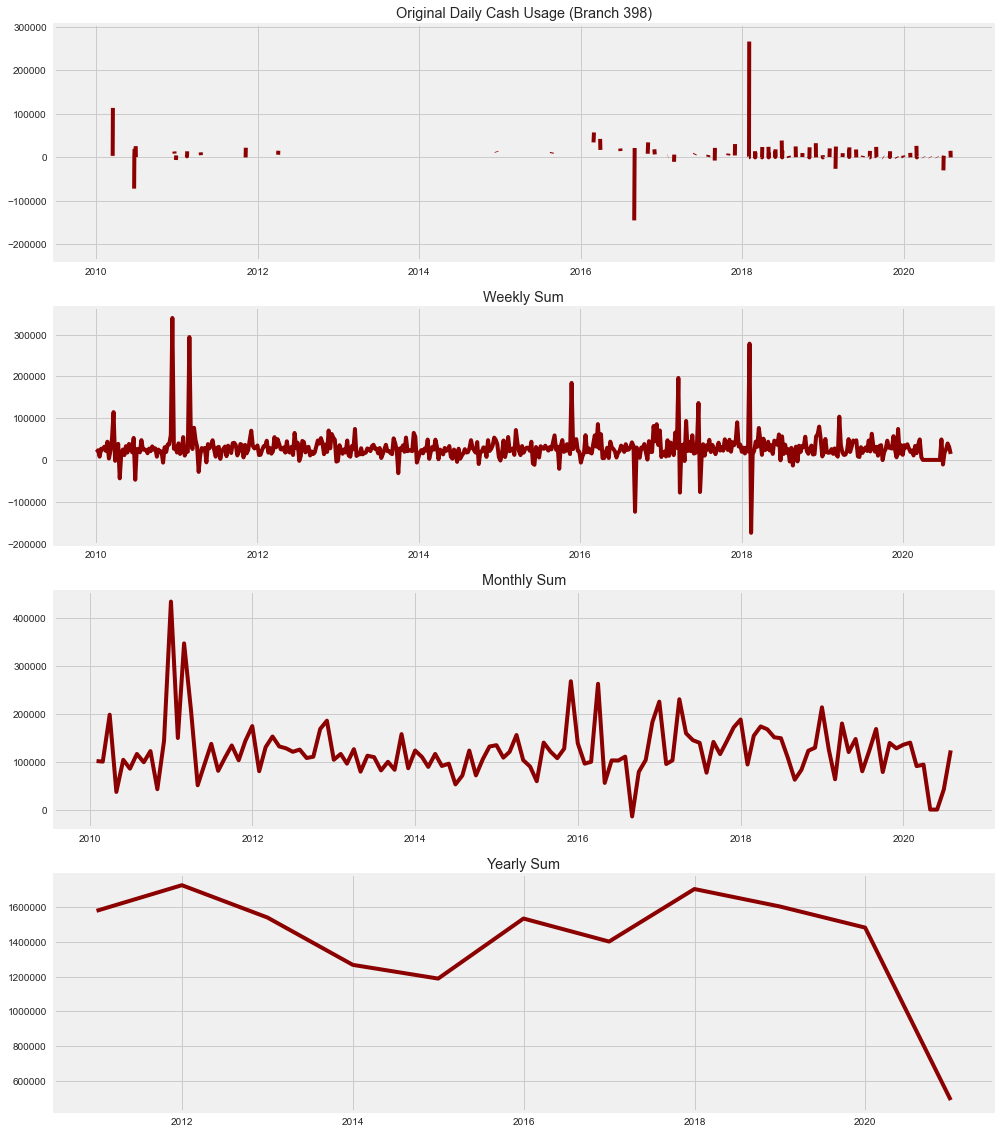

In [144]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,20))
axes[0].plot(df_branch.index, 'TotalCashUsed', data = df_branch, color="darkred")
axes[0].set_title('Original Daily Cash Usage (Branch 398)')
axes[0].ticklabel_format(style='plain', axis='y')

axes[1].plot(df_branch_by_week.index, 'TotalCashUsed', data = df_branch_by_week, color="darkred")
axes[1].set_title('Weekly Sum')
axes[1].ticklabel_format(style='plain', axis='y')

axes[2].plot(df_branch_by_month.index, 'TotalCashUsed', data = df_branch_by_month, color="darkred")
axes[2].set_title('Monthly Sum')
axes[2].ticklabel_format(style='plain', axis='y')

axes[3].plot(df_branch_by_year.index, 'TotalCashUsed', data = df_branch_by_year, color="darkred")
axes[3].set_title('Yearly Sum')
axes[3].ticklabel_format(style='plain', axis='y')

1. Big differences by branch
2. Naive seaonal prediction based on last year's data at the same time cannot capture the changes in the new year, especially during the COVID

# Branch closing dates

In [93]:
# Find zero cash days by branch
# cannot fill original df, it will influence the model. Make a copy of the data and fill na with zero
mydata = df.copy()
mydata['CashBalance_StartOfDay'].fillna(0, inplace = True)
mydata ['CashOrdersReceived'].fillna(0, inplace=True)
mydata ['TotalCashUsed'].fillna(0, inplace=True)

In [94]:
## find weekdays with zeros by branch from 2018 to 2020
df_zero = mydata[mydata['TotalCashUsed']==0]
zero_count = df_zero['2018':'2020'].groupby(['BranchID', 'Day_name'])[['TotalCashUsed']].count()
total_count = mydata['2018':'2020'].groupby(['BranchID', 'Day_name'])[['TotalCashUsed']].count()
percent_zero = zero_count/total_count
mask =percent_zero['TotalCashUsed']> 0.9
zero_list = percent_zero[mask].reset_index()

zero_dict=dict()
for index, row in zero_list.iterrows():
    if row['Day_name'] in zero_dict.keys():
        zero_dict[row['Day_name']].append(row['BranchID'])
    else:
        zero_dict[row['Day_name']]= [row['BranchID']]

In [95]:
zero_dict

{'Saturday': [99,
  108,
  110,
  111,
  115,
  118,
  125,
  126,
  131,
  133,
  140,
  144,
  151,
  154,
  155,
  169,
  177,
  196,
  203,
  217,
  230,
  267,
  270,
  273,
  289,
  290,
  317,
  319,
  323,
  325,
  333,
  334,
  336,
  344,
  356,
  364,
  367,
  370,
  398,
  415,
  425,
  433,
  434,
  441,
  458,
  469,
  501],
 'Friday': [126, 177, 273, 319, 323, 325, 370, 441, 458],
 'Tuesday': [319],
 'Monday': [458],
 'Wednesday': [458]}

Text(0.5, 1.0, 'Days of the Week Branches Closed 90% of the time (2018-2020)')

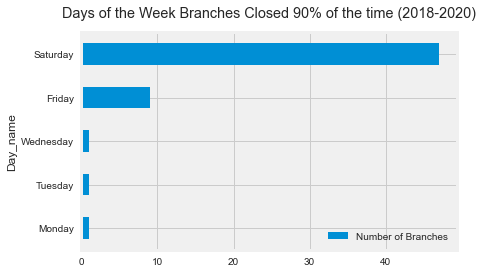

In [96]:
zero_list.groupby(['Day_name'])[['BranchID']].count().sort_values(by='BranchID').plot.barh()
plt.legend(["Number of Branches"])
plt.title('Days of the Week Branches Closed 90% of the time (2018-2020)', pad=15)

In [97]:
# Find Zero Cash holidays by branch from 2015 to 2020
df_zero = mydata[mydata['TotalCashUsed']==0]
zero_count = df_zero['2015':'2020'].groupby(['BranchID', 'Holiday'])[['TotalCashUsed']].count()
total_count = mydata['2015':'2020'].groupby(['BranchID', 'Holiday'])[['TotalCashUsed']].count()
percent_zero = zero_count/total_count
mask =percent_zero['TotalCashUsed']> 0.9
zero_list = percent_zero[mask].reset_index()

zero_holiday_dict=dict()
for index, row in zero_list.iterrows():
    if row['Holiday'] in zero_holiday_dict.keys():
        zero_holiday_dict[row['Holiday']].append(row['BranchID'])
    else:
        zero_holiday_dict[row['Holiday']]= [row['BranchID']]

In [98]:
zero_holiday_dict

{'Independence Day (Observed)': [99,
  108,
  110,
  111,
  115,
  118,
  125,
  126,
  131,
  133,
  140,
  144,
  151,
  154,
  155,
  169,
  177,
  196,
  203,
  217,
  230,
  267,
  270,
  273,
  289,
  290,
  317,
  319,
  323,
  325,
  333,
  334,
  336,
  344,
  356,
  362,
  364,
  367,
  370,
  382,
  398,
  415,
  425,
  433,
  434,
  441,
  458,
  469,
  501],
 'Thanksgiving': [99,
  108,
  110,
  111,
  115,
  118,
  125,
  126,
  131,
  133,
  140,
  144,
  154,
  155,
  169,
  177,
  196,
  203,
  217,
  230,
  267,
  270,
  273,
  289,
  290,
  317,
  319,
  323,
  325,
  333,
  334,
  336,
  344,
  356,
  362,
  364,
  367,
  370,
  382,
  398,
  415,
  425,
  433,
  434,
  441,
  458,
  469,
  501],
 'Day After T-Day (TCU only)': [126, 177, 273, 319, 323, 325, 367, 370],
 'Christmas Day (Observed)': [267, 458],
 'Easter': [267, 398],
 "New Year's Day (Observed)": [267, 398, 458],
 'Columbus Day': [458],
 'Labor Day': [458],
 'Martin Luther King Jr. Day': [458],
 'Veter

Text(0.5, 1.0, 'Holidays Branches Closed 90% of the time (2015-2020)')

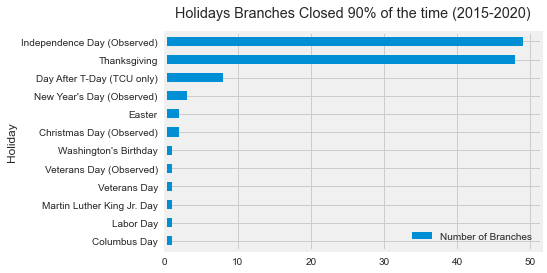

In [99]:
zero_list.groupby(['Holiday'])[['BranchID']].count().sort_values(by='BranchID').plot.barh()
plt.legend(["Number of Branches"])
plt.title('Holidays Branches Closed 90% of the time (2015-2020)', pad=15)